<a href="https://colab.research.google.com/github/rajnish80130/ridge-regression-Regularization-/blob/main/Ridge_Regression_(Regularization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_diabetes

data=load_diabetes()

In [8]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [9]:
X=data.data
y=data.target

In [11]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [15]:
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
print(lr.coef_)
print(lr.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [18]:
y_pred = lr.predict(X_test)

In [21]:
from sklearn.metrics import r2_score,mean_squared_error

print(f"R2 Score: {r2_score(y_test,y_pred)} ")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test,y_pred))} ")

R2 Score: 0.4399338661568968 
RMSE : 55.627840795469155 


In [30]:
from sklearn.linear_model import Ridge

Rd = Ridge(alpha=100)

In [31]:
Rd.fit(X_train,y_train)

Ridge(alpha=100)

In [32]:
print(Rd.coef_)
print(Rd.intercept_)

[ 2.85897975  0.62945259  7.54060523  5.84994946  2.71087881  2.14213467
 -4.83404702  5.10822346  7.44845112  4.57612909]
150.51593995113907


In [33]:
y_pred1=Rd.predict(X_test)

In [34]:
print(f"R2 Score: {r2_score(y_test,y_pred1)} ")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test,y_pred1))} ")

R2 Score: 0.010378115936827137 
RMSE : 73.9447239662773 


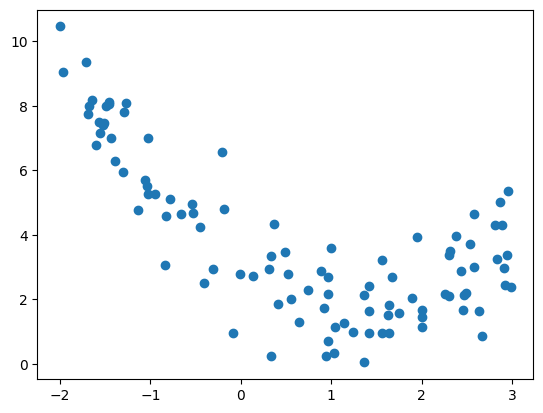

In [35]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

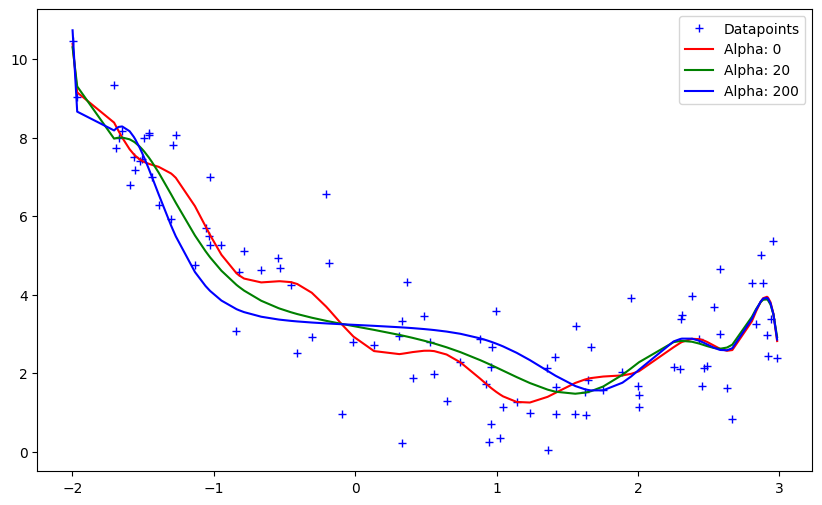

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()